In [1]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import matplotlib as mpl
import random

#%matplotlib ipympl
%matplotlib inline

In [22]:
# Extract data from Numpy files
basepath = 'results_wavenumber_cutoffs' + os.path.sep + 'FeedForwardNN' + os.path.sep
#basepath = 'results_wavenumber_cutoffs' + os.path.sep + 'FeedForwardNN_CNN' + os.path.sep
#basepath = 'results_wavenumber_cutoffs' + os.path.sep + 'RamanPredictorFCN' + os.path.sep

chemistry = np.load(basepath + 'all_chem.npy', allow_pickle=True)
names = np.load(basepath + 'all_names.npy', allow_pickle=True)
rruff_ids = np.load(basepath + 'all_rruffid.npy', allow_pickle=True)
spec = np.load(basepath + 'all_spectra.npy', allow_pickle=True)
spec_pred = np.load(basepath + 'all_spectra_predictions.npy', allow_pickle=True)

names_oxides = np.load('extracted_chemistry_oxide_names.npy', allow_pickle=True)

print("chemistry shape: ", chemistry.shape)
print("oxide names shape: ", names_oxides.shape)
print("names shape: ", names.shape)
print("RRUFF ids shape: ", rruff_ids.shape)
print("spec shape: ", spec.shape)
print("spec_pred shape: ", spec_pred.shape)
print("oxide names: ", names_oxides)

unique_minerals = np.unique(names)
print("Number of unique mineral names: ", len(unique_minerals))


chemistry shape:  (4585, 20)
oxide names shape:  (20,)
names shape:  (4585,)
RRUFF ids shape:  (4585,)
spec shape:  (4585, 1024)
spec_pred shape:  (4585, 1024)
oxide names:  ['Al2O3' 'As2O5' 'BaO' 'CO2' 'CaO' 'Cr2O3' 'CuO' 'Fe2O3' 'FeO' 'K2O' 'MgO'
 'MnO' 'Na2O' 'P2O5' 'PbO' 'SO3' 'SiO2' 'SrO' 'TiO2' 'ZnO']
Number of unique mineral names:  802


Mineral Name:  Jacobsite
RRUFF IDS:  ['R070719' 'R070719' 'R120170' 'R120170']
Chemistry total wt%: 97.935 ± 0.552
Fe2O3	58.126 ± 5.989
MnO	38.374 ± 5.144
MgO	1.056 ± 0.672
Al2O3	0.379 ± 0.379


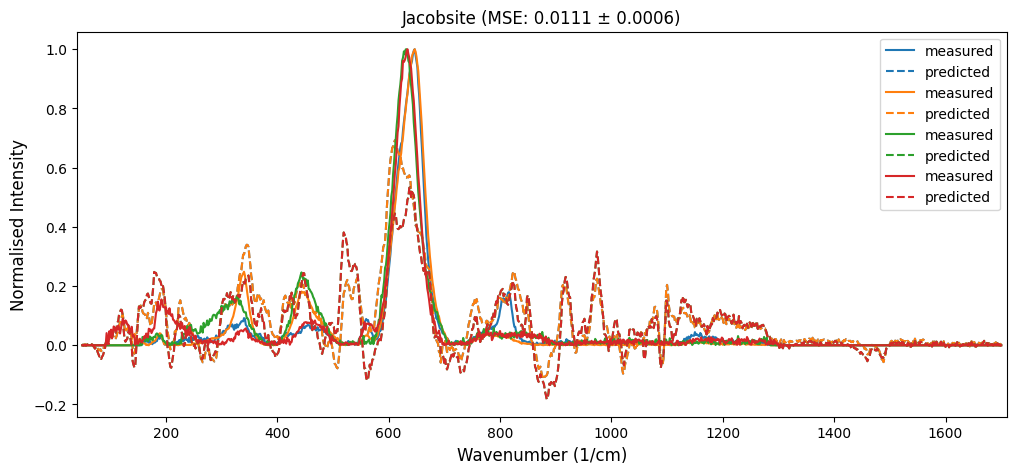

In [26]:
# plot a random spectrum 
idx_unique_mineral = random.randrange(len(unique_minerals))
name = unique_minerals[idx_unique_mineral]

idxs = np.where(names == name)[0]
chems = chemistry[idxs]

chem_sum_avg = np.mean(100*np.sum(chems, axis=1))
chem_sum_std = np.std(100*np.sum(chems, axis=1))

chem_avg = np.mean(chems, axis=0)
chem_std = np.std(chems, axis=0)
    
# Sort the chemistry in descending order
idx_sort_descending = (-chem_avg).argsort()
 
# Use the descending indices to get the elements in descending order
chem_avg = chem_avg[idx_sort_descending]
chem_std = chem_std[idx_sort_descending]
names_oxides_sorted = names_oxides[idx_sort_descending]

print("Mineral Name: ", name)
print("RRUFF IDS: ", rruff_ids[idxs])
print("Chemistry total wt%: {} ± {}".format(round(chem_sum_avg, 3), round(chem_sum_std, 3)))
for i in range(len(names_oxides)):
    value = 100 * chem_avg[i]
    value_std = 100 * chem_std[i]
    if value >= 0.0005:
        print("{}\t{} ± {}".format(names_oxides_sorted[i], round(value, 3), round(value_std, 3)))

x = np.linspace(50, 1700, 1024, endpoint=True)
y = spec[idxs,:]
y_pred = spec_pred[idxs, :]

mse_avg = np.average(np.mean((y - y_pred) ** 2, axis=1))
rmse_avg = np.sqrt(mse_avg)

mse_std = np.std(np.mean((y - y_pred) ** 2, axis=1))
rmse_std = np.sqrt(mse_std)

cmap = mpl.colormaps["tab10"]  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

colors = colors + colors + colors

fig, ax = plt.subplots(figsize=(12,5))
ax.set_xlabel("Wavenumber (1/cm)", fontsize=12)
ax.set_ylabel("Normalised Intensity", fontsize=12)
ax.set_title("{} (MSE: {} ± {})".format(name, round(mse_avg,4), round(mse_std,4)))
ax.set_xlim((40, 1710))

for i in range(y.shape[0]):
    ax.plot(x, y[i], color=colors[i], label='measured')
    ax.plot(x, y_pred[i], color=colors[i], linestyle='--', label='predicted')

    if i > 5:
        break

ax.legend(loc='best')

[616] ['Quartz']
Mineral Name:  ['Quartz']
RRUFF IDS:  ['R040031' 'R040031' 'R040031' 'R050125' 'R050125' 'R050125' 'R050125'
 'R050125' 'R050125' 'R050125' 'R050125' 'R050125' 'R060604' 'R060604']
Chemistry total wt%: 99.114 ± 0.971
SiO2	99.047 ± 0.961
Al2O3	0.019 ± 0.016
Na2O	0.016 ± 0.008
FeO	0.012 ± 0.003
K2O	0.006 ± 0.004
CaO	0.005 ± 0.004
MnO	0.005 ± 0.008
TiO2	0.002 ± 0.005
MgO	0.002 ± 0.001


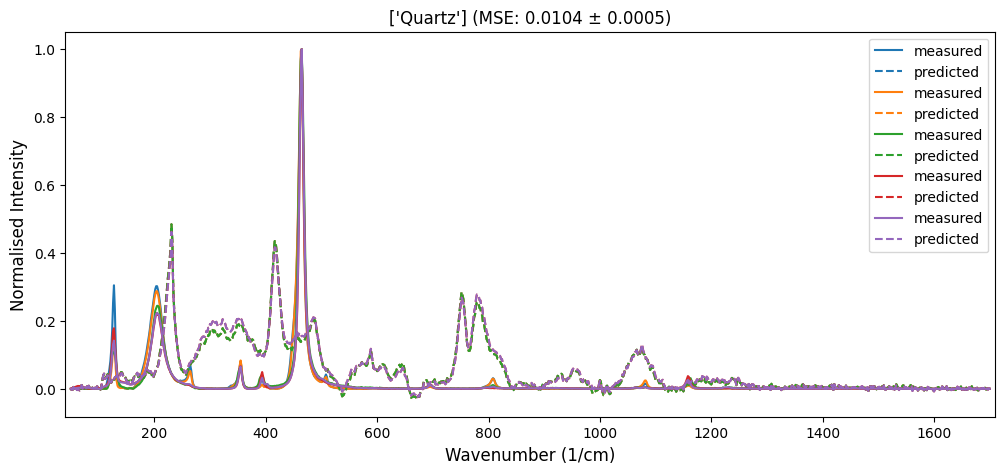

In [21]:
# plot quartz (sio2)
#for i in range(len(unique_minerals)):
#    print(unique_minerals[i])

idx_quartz = np.where(unique_minerals == 'Quartz')
name = unique_minerals[idx_quartz]
print(idx_quartz[0], name)

idxs = np.where(names == name)[0]
chems = chemistry[idxs]

chem_sum_avg = np.mean(100*np.sum(chems, axis=1))
chem_sum_std = np.std(100*np.sum(chems, axis=1))

chem_avg = np.mean(chems, axis=0)
chem_std = np.std(chems, axis=0)
    
# Sort the chemistry in descending order
idx_sort_descending = (-chem_avg).argsort()
 
# Use the descending indices to get the elements in descending order
chem_avg = chem_avg[idx_sort_descending]
chem_std = chem_std[idx_sort_descending]
names_oxides_sorted = names_oxides[idx_sort_descending]

print("Mineral Name: ", name)
print("RRUFF IDS: ", rruff_ids[idxs])
print("Chemistry total wt%: {} ± {}".format(round(chem_sum_avg, 3), round(chem_sum_std, 3)))
for i in range(len(names_oxides)):
    value = 100 * chem_avg[i]
    value_std = 100 * chem_std[i]
    if value >= 0.0005:
        print("{}\t{} ± {}".format(names_oxides_sorted[i], round(value, 3), round(value_std, 3)))

x = np.linspace(50, 1700, 1024, endpoint=True)
y = spec[idxs,:]
y_pred = spec_pred[idxs, :]

mse_avg = np.average(np.mean((y - y_pred) ** 2, axis=1))
rmse_avg = np.sqrt(mse_avg)

mse_std = np.std(np.mean((y - y_pred) ** 2, axis=1))
rmse_std = np.sqrt(mse_std)

cmap = mpl.colormaps["tab10"]  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

colors = colors + colors + colors

fig, ax = plt.subplots(figsize=(12,5))
ax.set_xlabel("Wavenumber (1/cm)", fontsize=12)
ax.set_ylabel("Normalised Intensity", fontsize=12)
ax.set_title("{} (MSE: {} ± {})".format(name, round(mse_avg,4), round(mse_std,4)))
ax.set_xlim((40, 1710))

for i in range(y.shape[0]):
    ax.plot(x, y[i], color=colors[i], label='measured')
    ax.plot(x, y_pred[i], color=colors[i], linestyle='--', label='predicted')

    if i > 3:
        break

ax.legend(loc='best')